In [2]:
import csv

In [3]:
import numpy as np

In [155]:
import pandas as pd

In [5]:
from numpy.random import RandomState

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('./spambase/spambase.data')

In [8]:
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
f = open('./spambase/spambase.data')

In [10]:
csv_file = csv.reader(f)

In [11]:
spambase = []

In [12]:
for row in csv_file:
    spambase.append(row)

In [13]:
f.close()

In [14]:
X = np.array([x[:-1] for x in spambase]).astype(np.float)

In [15]:
Y = np.array([x[-1] for x in spambase]).astype(np.float)

In [16]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3, random_state= 42,shuffle = True, stratify = Y)

In [66]:
def load_data():
    f = open('./spambase/spambase.data')
    csv_file = csv.reader(f)
    spambase = []
    for row in csv_file:
        spambase.append(row)
    f.close()
    X = np.array([x[:-1] for x in spambase]).astype(np.float)
    Y = np.array([x[-1] for x in spambase]).astype(np.float)
    del spambase
    return train_test_split(X, Y, test_size=0.3, random_state= 42,shuffle = True, stratify = Y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn import metrics

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)

In [20]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [21]:
Y_Pred = knn.predict(X_test)

In [22]:
metrics.accuracy_score(Y_test, Y_Pred)

0.7697320782041999

In [109]:
metrics.confusion_matrix(Y_test, Y_Pred)

array([[708, 129],
       [189, 355]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [112]:
logreg = LogisticRegression()

In [113]:
logreg.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
Y_Pred = logreg.predict(X_test)

In [124]:
metrics.accuracy_score(Y_test, Y_Pred)

0.9160028964518465

In [125]:
metrics.confusion_matrix(Y_test, Y_Pred)

array([[784,  53],
       [ 63, 481]])

In [126]:
Y_test[0:5]

array([0., 0., 1., 1., 1.])

In [127]:
Y_Pred[0:5]

array([0., 0., 1., 1., 1.])

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

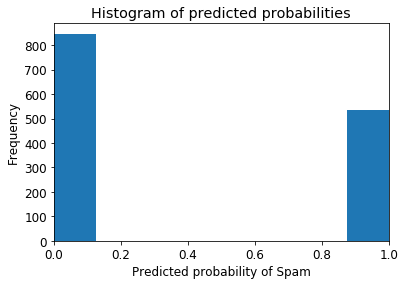

In [129]:
plt.hist(Y_Pred, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Spam')
plt.ylabel('Frequency')

In [132]:
False_Positive = confusion[0, 1]
False_Negative = confusion[1, 0]
Total_Positive = confusion[1, 1]
Total_Negative = confusion[0, 0]

In [133]:
print((Total_Positive + Total_Negative) / float(Total_Negative + Total_Positive + False_Positive + False_Negative))

0.9160028964518465


In [134]:
print(metrics.accuracy_score(Y_test, Y_pred_class))

0.9283128167994207


In [135]:
overall_error = (False_Positive + False_Negative) / float(Total_Negative + Total_Positive + False_Positive + False_Negative)

In [136]:
print(overall_error)

0.08399710354815351


In [137]:
print(1 - metrics.accuracy_score(Y_test, Y_pred_class))

0.07168718320057932


In [138]:
specificity = Total_Negative / (Total_Negative + False_Positive)

print(specificity)

0.9366786140979689


In [139]:
false_positive_rate = False_Positive / float(Total_Negative + False_Positive)
print(false_positive_rate)
print(1 - specificity)

0.06332138590203107
0.06332138590203107


In [140]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [141]:
print(y_pred_prob)

[4.26033274e-07 1.28371879e-05 9.07148418e-01 ... 7.32768968e-02
 8.76941126e-01 6.97502819e-02]


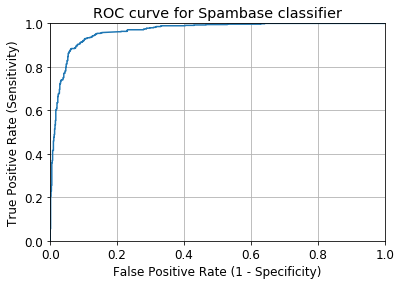

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Spambase classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [145]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score
print(cross_val_score(logreg, X, Y, cv=10))

[0.93058568 0.92407809 0.9175705  0.94565217 0.9326087  0.93478261
 0.95434783 0.93913043 0.8496732  0.85620915]


In [146]:
import numpy as np
print(np.mean(cross_val_score(logreg, X, Y, cv=10)))

0.9184638365390484


In [147]:
X_train = X_train[:, 0:48]
X_test = X_test[:, 0:48]

In [148]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc

In [149]:
clf = BernoulliNB(binarize=0.31)

In [150]:
clf.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.31, class_prior=None, fit_prior=True)

In [151]:
scores=[]
roc_auc = []
k=5

In [152]:
for i in range(50):
    X_train, X_test, Y_train, Y_test = load_data()
    X_train = X_train[:, 0:48]
    X_test = X_test[:, 0:48]
    clf = BernoulliNB(binarize=0.31)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))
    fpr, tpr, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc.append(auc(fpr, tpr))

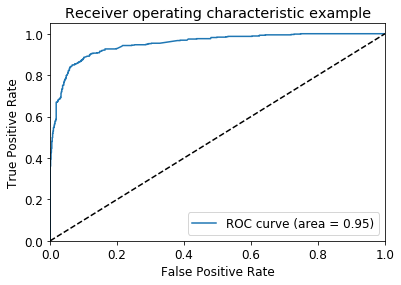

In [153]:
fpr, tpr, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [154]:
print('Accuracy. Avg: %0.5f, Std: %0.5f' % (np.mean(scores), np.std(scores)))
print('AUC. Avg: %0.5f, Std: %0.5f' % (np.mean(roc_auc), np.std(roc_auc)))

Accuracy. Avg: 0.89790, Std: 0.00000
AUC. Avg: 0.95185, Std: 0.00000


In [157]:
pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_Pred),
    index=[['actual', 'actual'], ['Spam', 'Not Spam']],
    columns=[['predicted', 'predicted'], ['Spam', 'Not Spam']]
)

predicted         
                     Spam Not Spam
actual Spam           784       53
       Not Spam        63      481